### Checking Temperature in Areas Contrasted with Alcohol Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ac_df = pd.read_csv('../data/modified/2015_states_sorted.csv')
ac_df = ac_df.drop(columns=['Unnamed: 0','year'])

ac_df = np.round(ac_df, decimals = 2)

us_state_abbrev = {
'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO',
'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID',
'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA',
'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new Jersey': 'NJ',
'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK',
'oregon': 'OR', 'pennsylvania': 'PA', 'phode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD',
'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA',
'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'}

ac_df['STATE'] = ac_df['state'].map(us_state_abbrev)
# ac_df.columns.values[0] = 'STATE'

t_df = pd.read_csv('../data/modified/2015_state_temperatures.csv')

t_df = t_df.drop(columns=['CITY','Unnamed: 0'])
t_annual = t_df[['ANN','STATE']]
t_annual['STATE'] = t_annual['STATE'].astype('string')
type(t_annual['STATE'][0])




/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


str

In [10]:
ac_df.drop(['state'], axis = 1, inplace = True)

In [11]:
ac_df['STATE'] = ac_df['STATE'].astype('string')

In [12]:
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ethanol_beer_gallons_per_capita        56 non-null     float64
 1   ethanol_wine_gallons_per_capita        56 non-null     float64
 2   ethanol_spirit_gallons_per_capita      56 non-null     float64
 3   ethanol_all_drinks_gallons_per_capita  56 non-null     float64
 4   number_of_beers                        56 non-null     float64
 5   number_of_glasses_wine                 56 non-null     float64
 6   number_of_shots_liquor                 56 non-null     float64
 7   number_of_drinks_total                 56 non-null     float64
 8   STATE                                  48 non-null     string 
dtypes: float64(8), string(1)
memory usage: 4.1 KB


### Merge Dataframes

In [17]:
left_merge = ac_df.merge(t_annual, how='left', on = 'STATE')

In [18]:
left_merge

,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,STATE,ANN
0,1.11,0.26,0.64,2.01,263.11,51.60,132.88,428.80,AL,107.0
1,1.11,0.26,0.64,2.01,263.11,51.60,132.88,428.80,AL,106.0
2,1.11,0.26,0.64,2.01,263.11,51.60,132.88,428.80,AL,105.0
3,1.11,0.26,0.64,2.01,263.11,51.60,132.88,428.80,AL,106.0
4,1.11,0.53,1.20,2.84,263.11,105.18,249.15,605.87,AK,85.0
...,...,...,...,...,...,...,...,...,...,...
252,1.39,0.39,1.20,2.98,329.48,77.40,249.15,635.73,WI,103.0
253,1.25,0.31,1.18,2.74,296.30,61.52,245.00,584.53,WY,104.0
254,1.25,0.31,1.18,2.74,296.30,61.52,245.00,584.53,WY,100.0
255,1.25,0.31,1.18,2.74,296.30,61.52,245.00,584.53,WY,101.0


In [19]:
mean_by_state = left_merge.groupby('STATE').mean()

In [37]:
m_state = mean_by_state.copy()
m_state.head(10)

,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
STATE,,,,,,,,,
AK,1.11,0.53,1.20,2.84,263.11,105.18,249.15,605.87,87.550000
AL,1.11,0.26,0.64,2.01,263.11,51.60,132.88,428.80,106.000000
AR,0.97,0.22,0.65,1.83,229.93,43.66,134.96,390.40,114.500000
AZ,1.16,0.40,0.78,2.34,274.96,79.38,161.95,499.20,111.750000
CA,1.00,0.53,0.75,2.28,237.04,105.18,155.72,486.40,110.153846
CO,1.12,0.51,1.14,2.77,265.48,101.21,236.69,590.93,103.200000
CT,0.85,0.61,0.95,2.41,201.48,121.05,197.24,514.13,103.000000
DE,1.19,0.72,1.75,3.66,282.07,142.88,363.34,780.80,103.000000
FL,1.11,0.51,0.98,2.61,263.11,101.21,203.47,556.80,101.666667


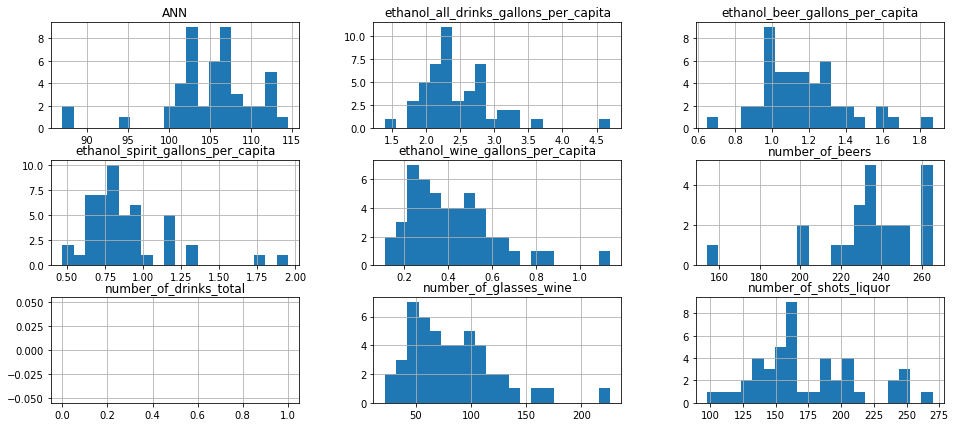

In [71]:
bins = 20
# plt.hlines('m_state[ANN].median',0,10)
m_state[m_state <= 270].hist(bins=bins, figsize=(16,7));

In [45]:
# m_state['number_of_drinks_total'].hist(bins = bins);

In [39]:
m_state.mean()

ethanol_beer_gallons_per_capita            1.166458
ethanol_wine_gallons_per_capita            0.413542
ethanol_spirit_gallons_per_capita          0.888125
ethanol_all_drinks_gallons_per_capita      2.468333
number_of_beers                          276.494167
number_of_glasses_wine                    82.067292
number_of_shots_liquor                   184.396042
number_of_drinks_total                   526.578333
ANN                                      105.138738
dtype: float64

In [54]:
m_state.sort_values(by = 'ANN',ascending= False).head(20)

,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total,ANN
STATE,,,,,,,,,
AR,0.97,0.22,0.65,1.83,229.93,43.66,134.96,390.40,114.500000
OK,1.07,0.19,0.62,1.89,253.63,37.71,128.73,403.20,113.000000
KS,1.03,0.14,0.74,1.91,244.15,27.78,153.64,407.47,112.600000
MO,1.17,0.39,0.97,2.53,277.33,77.40,201.39,539.73,112.000000
SD,1.49,0.29,1.03,2.81,353.19,57.55,213.85,599.47,112.000000
AZ,1.16,0.40,0.78,2.34,274.96,79.38,161.95,499.20,111.750000
NE,1.34,0.22,0.71,2.27,317.63,43.66,147.41,484.27,111.142857
TX,1.28,0.33,0.67,2.28,303.41,65.49,139.11,486.40,111.055556
CA,1.00,0.53,0.75,2.28,237.04,105.18,155.72,486.40,110.153846


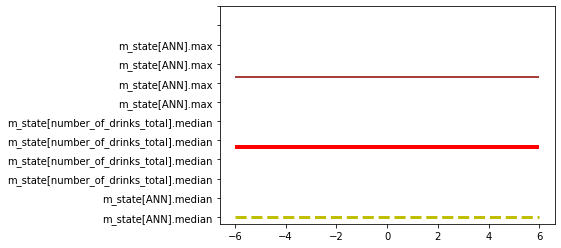

In [76]:
plt.hlines('m_state[ANN].median',-6,6,colors='y', linewidth = 3, linestyle = '--' );
plt.hlines('m_state[number_of_drinks_total].median',-6,6,colors='r', linewidth = 4);
plt.hlines('m_state[ANN].max',-6,6,colors='darkred');
plt.plot()
plt.yticks(np.linspace(0,3,12));

In [56]:
# ac_df.merge(t_annual , left_on='STATE',  how='left')

# ac_df.merge(t_annual , on='STATE',  how='left')

# ac_df = ac_df.dropna()

# a_df_sort = ac_df.sort_values(by = "number_of_drinks_total", axis = 0, ascending = False)

# t_df = t_df.drop(columns=['CITY','Unnamed: 0'])

# # New DataFrame with Annual Temp by State
# t_annual = t_df[['ANN','STATE']]
# t_cond = t_df[['FEB', 'MAY', 'AUG', 'NOV', 'STATE']]

# Compress Rows / Eliminate Duplicates
# t_comp = t_cond.groupby(['STATE']).agg('mean')

# t_annual = t_annual.groupby(['STATE']).agg('mean')

# t_annual['STATE'] = t_annual.index

# t_annual = t_annual.reset_index()

# t_comp.drop(index = 'KWAJALEIN- MARSHALL',inplace=True)
# t_annual.drop('KWAJALEIN- MARSHALL', axis=0)

# t_ann_comp = t_annual.groupby(['STATE']).agg('mean')
# t_ann_comp.drop(index = 'KWAJALEIN- MARSHALL',inplace=True)
# t_comp['MAY'] = t_comp['MAY'].fillna(1)

# t_comp.describe()
# t_annual.describe()
# t_comp.describe()

# ac_df['state'] = ac_df['state'].str.upper()
# # 
# ac_df.columns.values[0] = 'STATE'
# ac_df.head(1)
# ac_df.merge(t_annual , on='STATE',  how='left')
# t_annual.info

In [57]:
# bins = 20
# plt.hist(ac_df['number_of_drinks_total'], bins = bins);

In [58]:
# ac_df[(ac_df['number_of_drinks_total']) <= 500].hist(bins=10,figsize=(14,10));
# ac_df.columns

In [59]:
# df = df.drop(columns=['Unnamed: 0'])

# df = np.round(df, decimals = 2)

# # ac_df.head(10)

# us_state_abbrev = {
# 'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO',
# 'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID',
# 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA',
# 'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
# 'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new Jersey': 'NJ',
# 'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK',
# 'oregon': 'OR', 'pennsylvania': 'PA', 'phode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD',
# 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA',
# 'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'}

# df['state'] = df['state'].map(us_state_abbrev)


# df = df.dropna()

# # df.head(10)

# # df.to_csv('../data/modified/2015_alcohol_stats.csv')
# # ac_df.sort_values